In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [ ]:

vehicle=pd.read_excel("/content/Cars24_all_india_24_states_data.xlsx")

In [ ]:
vehicle.columns

Index(['year', 'company_name', 'car_name', 'City_Name', 'Address',
       'kilometers', 'fuel_type', 'owner_type', 'EMI Amount', 'price of car',
       'Gear_Type', 'car_age'],
      dtype='object')

In [ ]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 428 entries, 0 to 459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          428 non-null    int64 
 1   company_name  428 non-null    object
 2   car_name      428 non-null    object
 3   City_Name     428 non-null    object
 4   Address       428 non-null    object
 5   kilometers    428 non-null    int64 
 6   fuel_type     428 non-null    object
 7   owner_type    428 non-null    object
 8   EMI Amount    428 non-null    int64 
 9   price of car  428 non-null    int64 
 10  Gear_Type     428 non-null    object
 11  car_age       428 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 43.5+ KB


In [ ]:
vehicle.head()

,year,company_name,car_name,City_Name,Address,kilometers,fuel_type,owner_type,EMI Amount,price of car,Gear_Type,car_age
0,2018,Maruti,Alto K10 VXI,Bengaluru,Bellahalli,41523,Petrol,1st,7402,379000,Manual,6
1,2017,Renault,Duster 85 PS RXZ DIESEL,Bengaluru,Garuda Mall Magrath Road,41523,Petrol,2nd,14154,724000,Manual,7
2,2016,Maruti,Alto K10 VXI,Bengaluru,Whitefield Main Road Bhoruka Tech Park Benga...,65574,Petrol,3rd,6217,318000,Manual,8
3,2023,Honda,City 1.5L I-VTEC ZX,Bengaluru,Gandhi Nagar,1,Petrol,1st,25715,1351000,Manual,1
4,2016,Hyundai,Elite i20 ASTA 1.2 (O),Bengaluru,Gandhi Nagar,43248,Petrol,1st,12861,658000,Manual,8


In [ ]:
vehicle.shape

(460, 12)

# **Data Describe**

In [ ]:
vehicle.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,460.0,9.500000,5.772559,0.00,4.7500,9.500,14.250,19.00
year,460.0,2018.969565,2.602820,2011.00,2017.0000,2019.000,2021.000,2023.00
kilometers,379.0,41523.696570,26627.722512,1.00,21400.5000,39583.000,62671.000,99710.00
EMI Amount,460.0,13279.576087,6137.197553,4379.00,9550.2500,11847.500,14887.750,41018.00
price of car,460.0,6.758957,3.321220,1.71,4.6675,5.965,7.615,21.55


In [ ]:
vehicle.describe(include='object').T

,count,unique,top,freq
company_name,460,15,Maruti,122
car_name,460,243,Grand i10 SPORTZ 1.2 KAPPA VTVT,10
State_Name,460,24,Chandigarh,40
Address,460,42,"['Metro', 'Walk,', 'Rohini,']",22
fuel_type,459,77,Petrol,295
owner_type,460,67,1st owner,262
Gear_Type,460,2,Manual,364


# **Data Cleaning**

In [ ]:
object_columns=vehicle.select_dtypes(include="object")
for i in object_columns:
  print(vehicle[i].value_counts())
  print("******"*20)

company_name
Maruti        122
Hyundai       110
Tata           57
Honda          47
Renault        22
Mahindra       22
Ford           19
KIA            15
Volkswagen     10
Nissan         10
Skoda           9
MG              6
Datsun          5
Toyota          5
Jeep            1
Name: count, dtype: int64
************************************************************************************************************************
car_name
Grand i10 SPORTZ 1.2 KAPPA VTVT           10
Baleno ZETA PETROL 1.2                     9
Wagon R 1.0 VXI                            7
Amaze 1.2L I-VTEC S                        6
Baleno DELTA PETROL 1.2                    6
                                          ..
Verna 1.6 VTVT SX + AT                     1
Amaze 1.5L I-DTEC S                        1
Kwid RXT 0.8                               1
GRAND I10 NIOS ASTA AMT 1.2 KAPPA VTVT     1
ALTROZ XM PETROL                           1
Name: count, Length: 243, dtype: int64
***************************

In [ ]:
numerical_columns=vehicle.select_dtypes(include="number")
for i in numerical_columns:
  print(vehicle[i].value_counts())
  print("*******"*20)

Unnamed: 0
0     23
1     23
18    23
17    23
16    23
15    23
14    23
13    23
12    23
11    23
10    23
9     23
8     23
7     23
6     23
5     23
4     23
3     23
2     23
19    23
Name: count, dtype: int64
********************************************************************************************************************************************
year
2022    72
2019    61
2018    56
2020    56
2021    54
2017    53
2016    36
2023    26
2015    20
2014    13
2013    10
2011     2
2012     1
Name: count, dtype: int64
********************************************************************************************************************************************
kilometers
1.0        29
6676.0      4
66729.0     4
38553.0     4
65434.0     4
           ..
25366.0     1
43851.0     1
34727.0     1
91199.0     1
41212.0     1
Name: count, Length: 289, dtype: int64
***************************************************************************************************************************

In [ ]:
vehicle.drop(columns=["Unnamed: 0"],inplace=True)

In [ ]:
vehicle.isnull().sum()

,0
year,0
company_name,0
car_name,0
State_Name,0
Address,0
kilometers,81
fuel_type,1
owner_type,0
EMI Amount,0
price of car,0


In [ ]:
vehicle['kilometers']=vehicle['kilometers'].fillna(vehicle['kilometers'].mean())

In [ ]:
vehicle['fuel_type']=vehicle['fuel_type'].str.replace('CNG1st','CNG')
vehicle['fuel_type']=vehicle['fuel_type'].str.replace('CNG2nd','CNG')

In [ ]:
vehicle['fuel_type']=vehicle['fuel_type'].str.replace('CNG3rd','CNG')

In [ ]:
vehicle['fuel_type']=vehicle['fuel_type'].where(vehicle['fuel_type'].isin(['Petrol','Diesel','CNG']),np.nan)


In [ ]:
vehicle['fuel_type']=vehicle['fuel_type'].fillna(vehicle['fuel_type'].mode()[0])

In [ ]:
vehicle.duplicated().sum()

32

In [ ]:
vehicle['price of car']=vehicle['price of car']*100000

In [ ]:
vehicle['price of car']=vehicle['price of car'].astype('int')

In [ ]:
vehicle['kilometers']=vehicle['kilometers'].astype('int')

In [ ]:
vehicle.drop_duplicates(inplace=True)

In [ ]:
vehicle['Gear_Type'].value_counts()

,count
Gear_Type,
Manual,342
Automatic,86


In [ ]:
vehicle['Address'].unique()

array(['Bellahalli,', 'Garuda Mall, Magrath Road,',
       'Whitefield Main Road, Bhoruka Tech Park, Benga...',
       'Gandhi Nagar', 'GT World Mall,', 'Thiruverkadu,', 'Navalur,',
       'MetroWalk,Rohini,', 'Sector-18,Noida', 'Chhatarpur,Delhi',
       'M3MUrbana,Golf', 'Kompally,', 'Bachupally,', 'Upperpally,',
       "['Goregaon,', 'Mumbai']", "['Mulund', 'West,']", "['Seawood']",
       'Maharishi', 'Naroda,', 'Karnavati', 'Himalaya', 'Paras',
       "['Sector-18,', 'Noida']", "['Chhatarpur,', 'Delhi']",
       "['Metro', 'Walk,', 'Rohini,']", "['M3M', 'Urbana,', 'Golf']",
       "['Vaishali,', 'Ghaziabad']", "['KW', 'Delhi', '6,']",
       "['Dewas', 'Naka,', 'Lasudia']", 'Mansarovar,', 'Kakkanad,',
       'Newtown,', "['Ansal', 'Golf', 'City,']",
       "['Paras', 'Downtown', 'Square,']", 'Kharbi,', "['Atal', 'Path,']",
       "['Amanora', 'Mall', 'apex']", "['Tathawade,', 'Pune']",
       "['Undri,', 'Pune']", "['Akshar', 'Party,']",
       "['Sachin', 'Magdalla', 'Road,']", "

In [ ]:
vehicle['Address']=vehicle['Address'].str.replace('[','')

In [ ]:
vehicle['Address']=vehicle['Address'].str.replace(']','')

In [ ]:
vehicle['owner_type'].unique()

array(['2 kmPetrol1st', '8 kmDiesel2nd', '3rd owner', ' none',
       '1st owner', '2nd owner', '6 kmPetrol1st', '4 kmPetrol2nd',
       '51 kmPetrol1st', '13 kmPetrol1st', '0 kmDiesel1st',
       '9 kmPetrol1st', ' owner', '85 kmPetrol1st', '1 kmPetrol1st',
       '8 kmDiesel1st', '08 kmCNG2nd', '79 kmPetrol1st', '5 kmPetrol1st',
       '6 kmDiesel1st', '14 kmPetrol1st', '4 kmDiesel2nd',
       '3 kmPetrol1st', '7 kmDiesel1st', '3 kmDiesel1st',
       ',941 kmPetrol3rd', '6 kmDiesel3rd', '336 kmDiesel1st',
       '95 kmPetrol2nd', '09 kmPetrol2nd', '32 kmPetrol1st',
       '42 kmPetrol1st', '99 kmPetrol2nd', '49 kmPetrol1st',
       '8 kmPetrol1st', '58 kmPetrol1st', '0 kmPetrol2nd',
       '13 kmPetrol2nd', '4 kmPetrol1st', '1 kmDiesel1st',
       '23 kmPetrol1st', '27 kmPetrol3rd', '16 kmPetrol2nd',
       '7 kmPetrol1st', '52 kmPetrol1st', '28 kmDiesel1st',
       '10 kmPetrol3rd', '47 kmPetrol2nd', '0 kmPetrol1st',
       '77 kmPetrol1st', '4 kmDiesel1st', '9 kmDiesel1st',
       

In [ ]:
vehicle['owner_type']=vehicle['owner_type'].str.extract(r'(1st|2nd|3rd)',expand=True)

In [ ]:
vehicle['owner_type']=vehicle['owner_type'].fillna(vehicle['owner_type'].mode()[0])

In [ ]:
vehicle['owner_type']

,owner_type
0,1st
1,2nd
2,3rd
3,1st
4,1st
...,...
455,1st
456,1st
457,2nd
458,1st


In [ ]:
vehicle['Address'] = vehicle['Address'].str.replace("'", "")

In [ ]:
vehicle['Address']=vehicle['Address'].str.replace(","," ")

In [ ]:
def counts(name1):
  print(vehicle[name1].value_counts())
  print("*******"*20)
  print(vehicle[name1].unique())

In [ ]:
counts('year')

year
2022    62
2019    57
2021    54
2018    53
2017    51
2020    49
2016    34
2023    22
2015    20
2014    13
2013    10
2011     2
2012     1
Name: count, dtype: int64
********************************************************************************************************************************************
[2018 2017 2016 2023 2021 2019 2013 2022 2014 2015 2020 2011 2012]


In [ ]:
counts('company_name')

company_name
Maruti        118
Hyundai       106
Tata           49
Honda          44
Renault        22
Mahindra       16
Ford           15
KIA            14
Volkswagen     10
Nissan         10
Skoda           9
Datsun          5
Toyota          5
MG              4
Jeep            1
Name: count, dtype: int64
********************************************************************************************************************************************
['Maruti' 'Renault' 'Honda' 'Hyundai' 'KIA' 'Tata' 'Volkswagen' 'Datsun'
 'Toyota' 'Skoda' 'Ford' 'Mahindra' 'MG' 'Nissan' 'Jeep']


In [ ]:
counts('car_name')

car_name
Grand i10 SPORTZ 1.2 KAPPA VTVT    10
Baleno ZETA PETROL 1.2              9
Wagon R 1.0 VXI                     7
Amaze 1.2L I-VTEC VX                6
Baleno DELTA PETROL 1.2             6
                                   ..
New Wagon-R VXI (O) 1.2             1
NEXON XM DIESEL                     1
Verna 1.6 VTVT SX + AT              1
Amaze 1.5L I-DTEC S                 1
ALTROZ XM PETROL                    1
Name: count, Length: 243, dtype: int64
********************************************************************************************************************************************
['Alto K10 VXI' 'Duster 85 PS RXZ DIESEL' 'City 1.5L I-VTEC ZX'
 'Elite i20 ASTA 1.2 (O)' 'TRIBER RXL MT' 'SELTOS HTK PLUS 1.5 DIESEL'
 'i10 SPORTZ 1.2' 'ALTROZ XZ I-TURBO PETROL' 'ALTROZ XZA PLUS' 'Swift VXI'
 'Ameo HIGHLINE PLUS 1.5L AT 16 ALLOY' 'Harrier XT PLUS 2.0L KRYOTEC'
 'Celerio ZXI' 'TRIBER RXZ' 'IGNIS ZETA 1.2' 'Creta SX PLUS AT 1.6 DIESEL'
 'Alto K10 VXI PLUS' 'NEXON XZA PLUS (

In [ ]:
counts('State_Name')

State_Name
Chandigarh    40
Delhi         24
Bengaluru     20
Indore        20
Surat         20
Rajkot        20
Pune          20
Patna         20
Nagpur        20
Lucknow       20
Kolkata       20
Kochi         20
Jaipur        20
Vadodara      20
Chennai       20
Ahmedabad     20
Agra          20
Mumbai        17
Hyderabad     17
Gurugram      15
Noida          7
Other          3
Attapur,       3
Ghaziabad      2
Name: count, dtype: int64
********************************************************************************************************************************************
['Bengaluru' 'Chennai' 'Delhi' 'Noida' 'Gurugram' 'Hyderabad' 'Attapur,'
 'Mumbai' 'Other' 'Agra' 'Ahmedabad' 'Chandigarh' 'Ghaziabad' 'Indore'
 'Jaipur' 'Kochi' 'Kolkata' 'Lucknow' 'Nagpur' 'Patna' 'Pune' 'Rajkot'
 'Surat' 'Vadodara']


In [ ]:
counts("Address")

Address
Paras                                                20
Maharishi                                            20
Sachin  Magdalla  Road                               20
Akshar  Party                                        20
Atal  Path                                           20
Kharbi                                               20
Paras  Downtown  Square                              20
Ansal  Golf  City                                    20
Newtown                                              20
Kakkanad                                             20
Mansarovar                                           20
Dewas  Naka   Lasudia                                20
New  Sama                                            20
Thiruverkadu                                         12
Kompally                                             12
Bellahalli                                           11
Karnavati                                            11
MetroWalk Rohini                        

In [ ]:
counts("kilometers")

kilometers
41523    77
1        27
2         3
63269     2
45206     2
         ..
76156     1
17297     1
45396     1
25366     1
41212     1
Name: count, Length: 290, dtype: int64
********************************************************************************************************************************************
[41523 65574     1 43248 54414 40508 97083 16535 16221 32533 63741 38004
 37624 19638  9166 45096 50441 82191 42270 52791 70609  4668 52756 70063
 54173  7578 39548 49779 49643 97642 58902 38553 65434 28221 11003 62839
 60452 15935 66729 34785  6676 63269 75502 71297 59733 94020 28842 93259
 77053 25847 37615 74173 32729 75042 16453 52881 62129 25787 46568 60099
 52488 82452 57810 76286 23265 57247  8477 16202 29156 72500 75924  5448
 43187     2 16366 47057 76907 16374 43419 10007 13379 14753 65842 55025
 40683 63949 60158 14237 91153 21520 30839 61049 46863 43662 49934 11550
 22824 90108 52574 14969 27443 26787 70502 77186 52748  5483 46338 79939
 39583 34028 47228 2

In [ ]:
counts("fuel_type")

fuel_type
Petrol    376
Diesel     38
CNG        14
Name: count, dtype: int64
********************************************************************************************************************************************
['Petrol' 'Diesel' 'CNG']


In [ ]:
counts("owner_type")

owner_type
1st    331
2nd     87
3rd     10
Name: count, dtype: int64
********************************************************************************************************************************************
['1st' '2nd' '3rd']


In [ ]:
counts("EMI Amount")

EMI Amount
9834     4
8915     4
12512    4
11144    3
11671    3
        ..
5109     1
6241     1
7820     1
7031     1
11468    1
Name: count, Length: 350, dtype: int64
********************************************************************************************************************************************
[ 7402 14154  6217 25715 12861 11026 21071  8558 15760 16103 10232 13079
 31444  8328 12962 12649 18155 10186 17987 10440 12805  6784 17530  7234
 14663 18482 14624 14491  9384 16008 16560  6334 10205 22060  8387  7898
 27047 25506  7801 11144 27428 14604 28399 14858  8641 21756 41018  6041
 13685  9675 29217 29408  9834  9845  8411 15418  5805 13255 15970  8172
 23031 12923 33500  9716 11789 16598 14878 16579  8309 11613 10264 28361
 13744 11671 28951  9149  8217  9189 11887 26039 12945 22727 15627 14799
 13333  9130 14408  7194 15452 12512 18197  8504 16845 17188  8035  8250
 10905 11632  8061 12248 11906 12409 14868  7038 20100 11476 16101 15523
 14741  8798  5846 12414 10870 

In [ ]:
counts("price of car")

price of car
503000     5
528000     4
446000     4
495000     4
557000     4
          ..
400000     1
267000     1
438999     1
705000     1
1167000    1
Name: count, Length: 310, dtype: int64
********************************************************************************************************************************************
[ 379000  724000  318000 1351000  658000  564000 1107000  325000  827999
  846000  459999  669000 1652000  426000  663000  647000  835000  521000
  944999  534000  655000  347000  921000  370000  750000  971000  748000
  741000  480000  841000  869999  324000  522000 1159000  429000  404000
 1421000 1340000  399000  570000 1441000  747000 1492000  760000  442000
 1143000 2155000  309000  700000  495000 1535000 1545000  503000  504000
  430000  810000  261000  678000  839000  418000 1210000  661000 1760000
  497000  603000  872000  761000  871000  425000  594000  525000 1490000
  703000  597000 1521000  468000  420000  470000  608000 1368000  275000
 119400

In [ ]:
counts("Gear_Type")

Gear_Type
Manual       342
Automatic     86
Name: count, dtype: int64
********************************************************************************************************************************************
['Manual' 'Automatic']


In [ ]:
vehicle.shape

(428, 11)

In [ ]:
vehicle.rename(columns={'State_Name':'City_Name'},inplace=True)

# **Outliers**

****************************************************************************************************


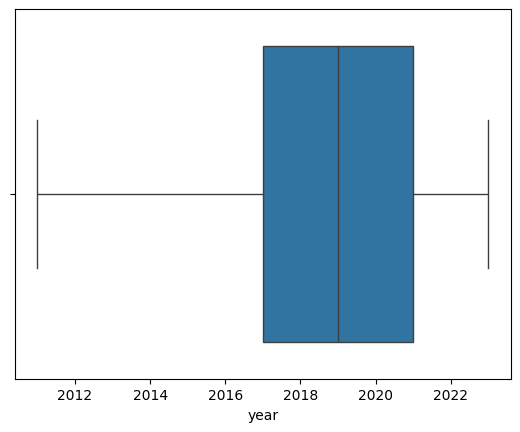

****************************************************************************************************


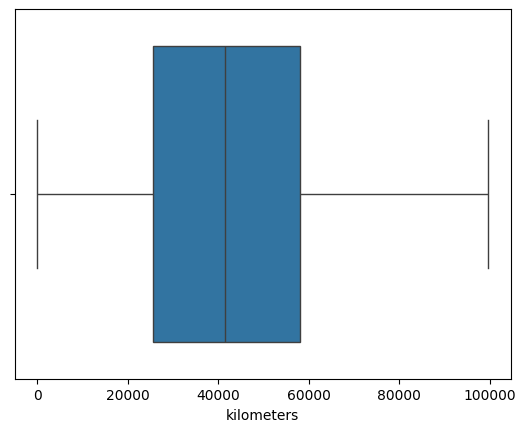

****************************************************************************************************


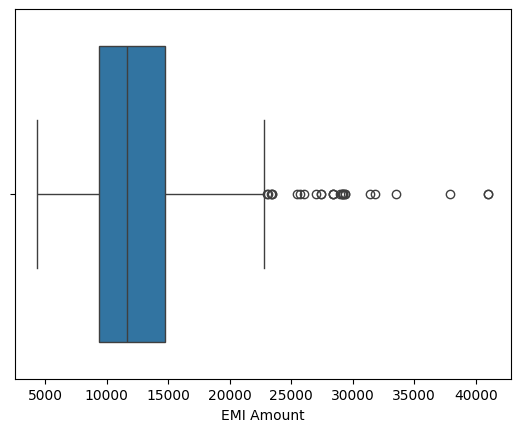

****************************************************************************************************


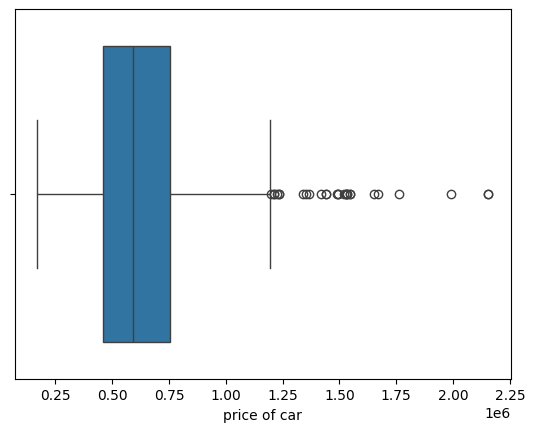

In [ ]:
numerical_data=vehicle.select_dtypes(include='number').columns
for col in numerical_data:
  sns.boxplot(data=vehicle,x=col)
  print("*****"*20)
  plt.show()

# **Data Distribution using Histogram for Numerical data**

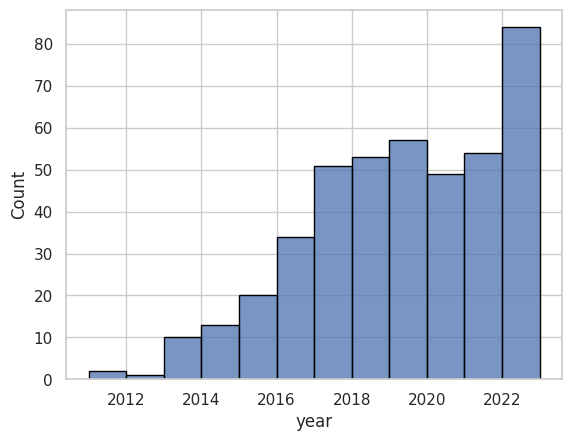

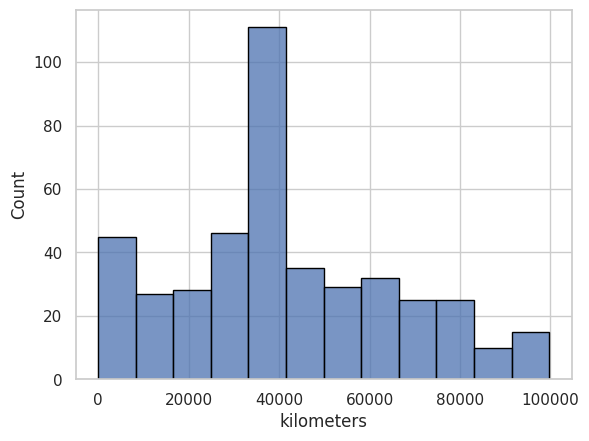

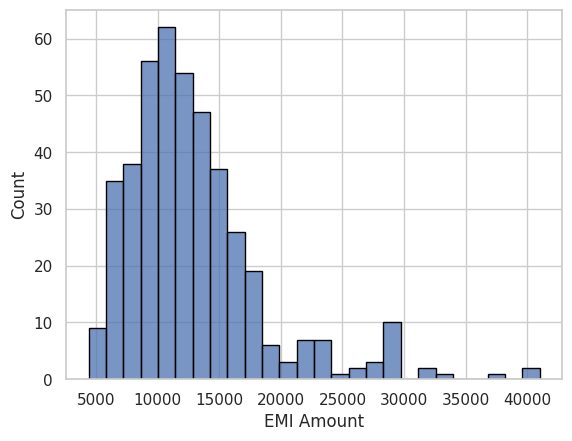

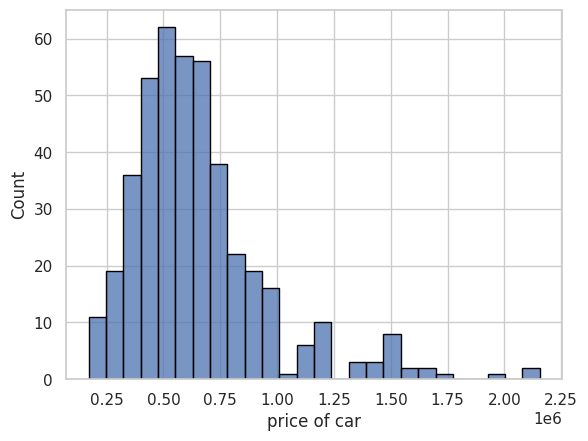

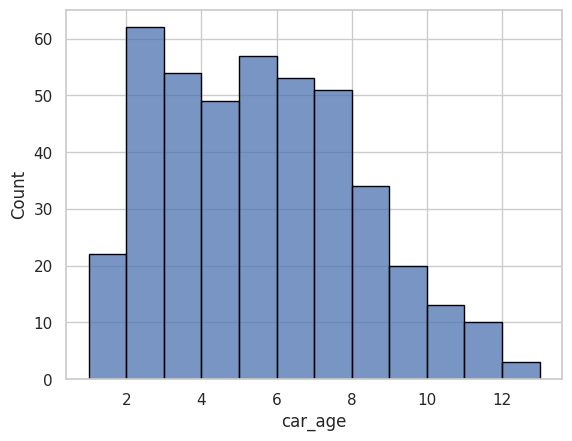

In [ ]:
numerical_columns=vehicle.select_dtypes(include='number').columns
for col in numerical_columns:
  sns.histplot(data=vehicle,x=col,edgecolor='black')
  plt.show()

# **Data Distribution using Categorical Data -- Univariate Analysis**

In [ ]:
def categorical_data(name1):
  plt.figure(figsize=(9,5))
  sns.countplot(x=name1,data=vehicle,edgecolor='black')
  plt.xticks(rotation=90)
  plt.ylabel('value counts')
  plt.show()

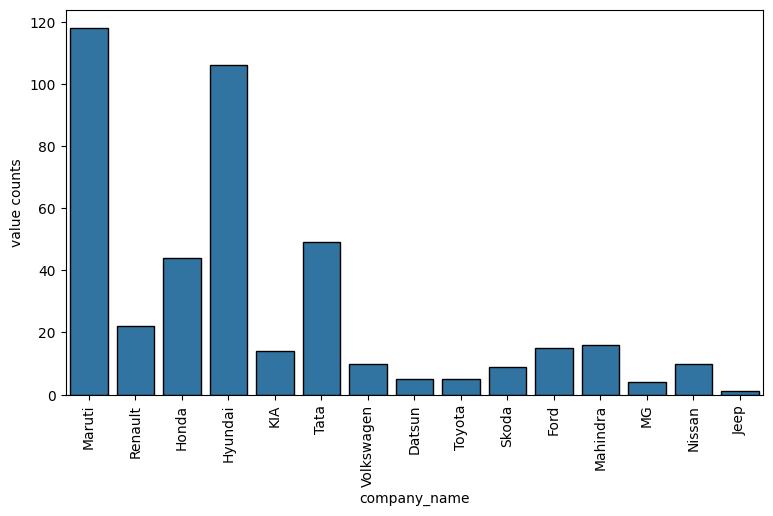

In [ ]:
categorical_data('company_name')

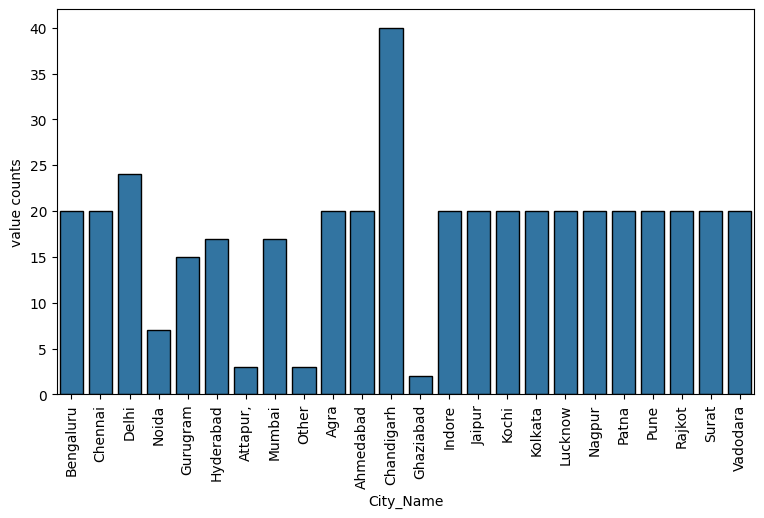

In [ ]:
categorical_data('City_Name')

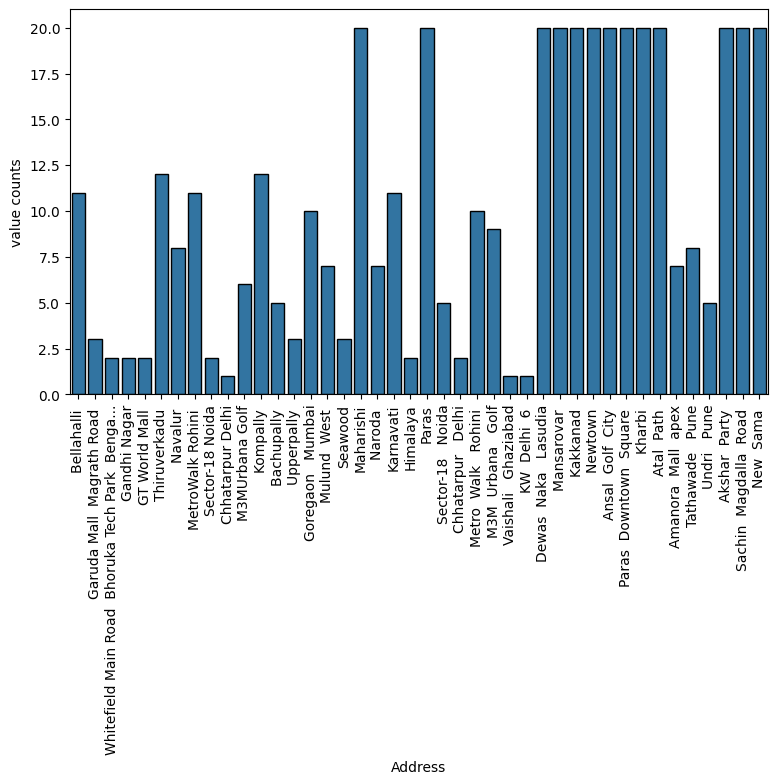

In [ ]:
categorical_data('Address')

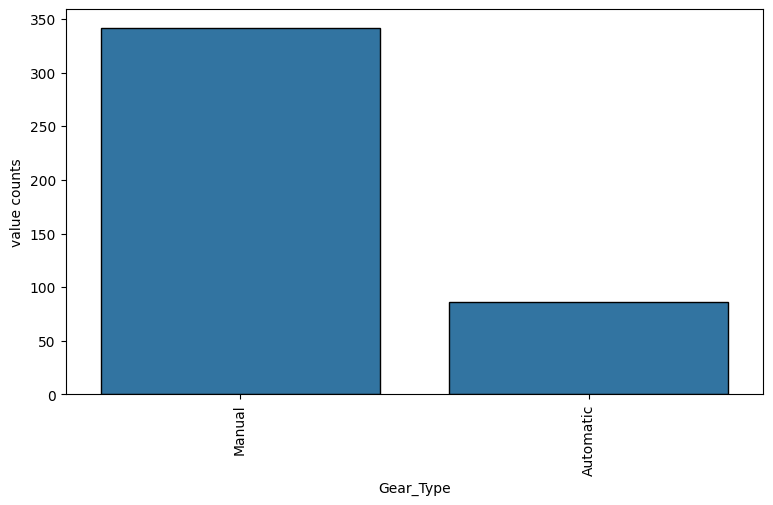

In [ ]:
categorical_data('Gear_Type')

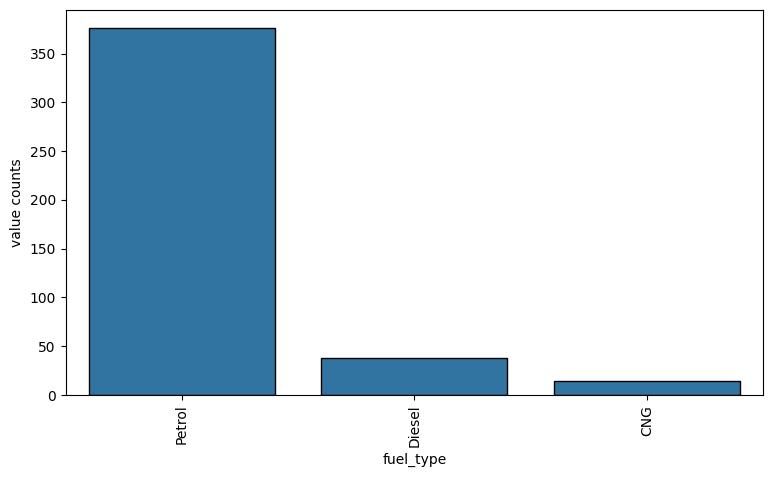

In [ ]:
categorical_data('fuel_type')

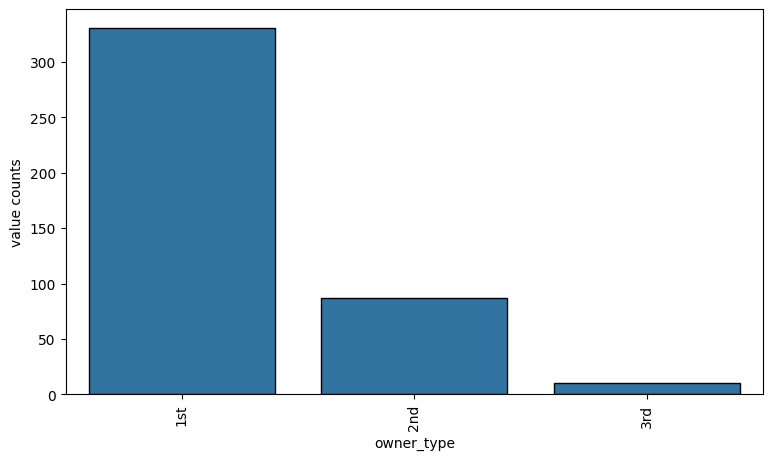

In [ ]:
categorical_data('owner_type')

# **Relationship between Numerical data using heatmap**

<Axes: >

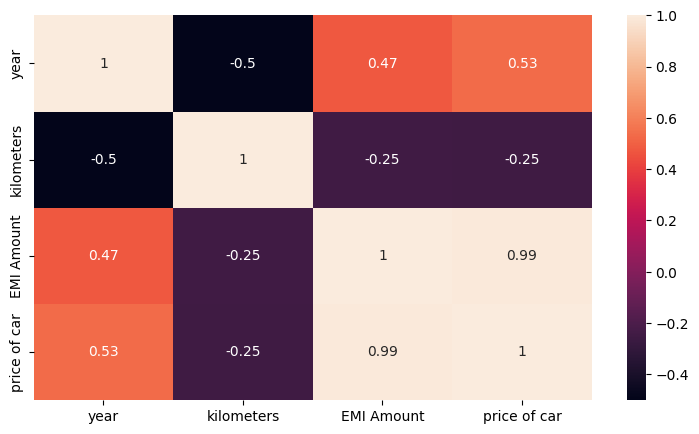

In [ ]:
numerical_column=vehicle.select_dtypes(include='number')
relation=numerical_column.corr()
plt.figure(figsize=(9,5))
sns.heatmap(relation,annot=True)

# **Checking Relation between data points using QQ-Plot**

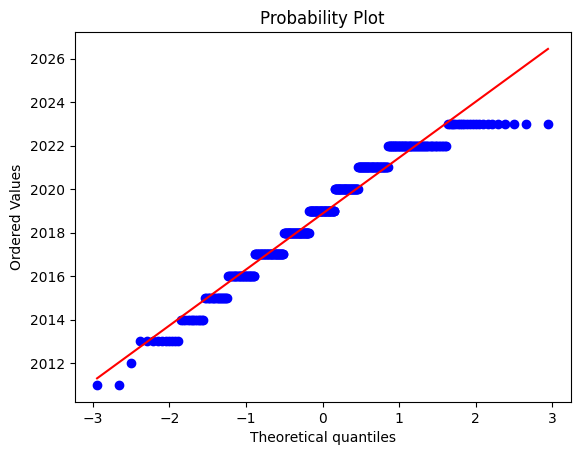

In [ ]:
data=stats.probplot(vehicle['year'],dist='norm',plot=plt)
plt.show()

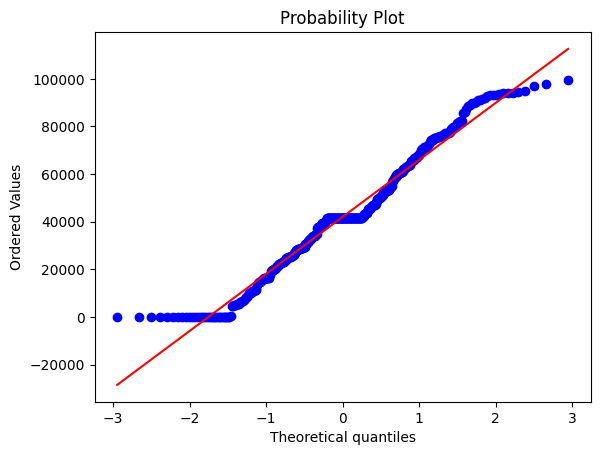

In [ ]:
data=stats.probplot(vehicle['kilometers'],dist="norm",plot=plt)
plt.show()


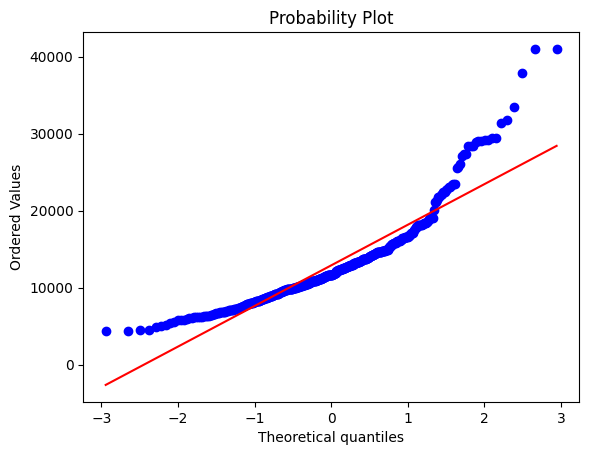

In [ ]:
stats.probplot(vehicle['EMI Amount'],dist='norm',plot=plt)
plt.show()

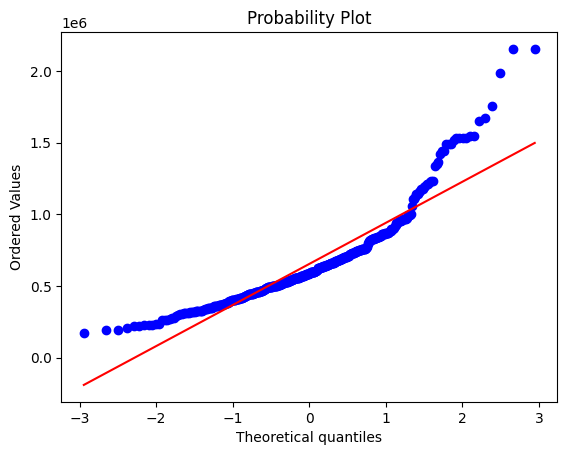

In [ ]:
stats.probplot(vehicle['price of car'],dist="norm",plot=plt)
plt.show()

# **Statistical test on categorical column**

In [ ]:
def chi_square_test(freq,significance_level):
  stat,p_value,dof,expected=stats.chi2_contingency(freq)
  print('stat=%3f,p_value=%3f' %(stat,p_value))
  if(p_value<significance_level):
    print('H0 is rejected:Probability is dependent')
  else:
    print('H0 is fail to reject:Probability is independent')
freq=pd.crosstab(vehicle['company_name'],vehicle['car_name'])
chi_square_test(freq,0.05)

stat=5992.000000,p_value=0.000000
H0 is rejected:Probability is dependent


In [ ]:
significance_level=0.05
freq=pd.crosstab(vehicle['City_Name'],vehicle['fuel_type']).T
stat,p_value,dof,expected=stats.chi2_contingency(freq)
print('stat=%3f,p_value=%3f' %(stat,p_value))
if(p_value<significance_level):
  print('H0 is rejected:probability is dependent')
else:
  print('Ho is fail to reject :probability is independent')


stat=60.587425,p_value=0.073191
Ho is fail to reject :probability is independent


# **Used Cars Analysis (Area-wise & All-India)**

# What are the average prices of used cars in different cities across India?

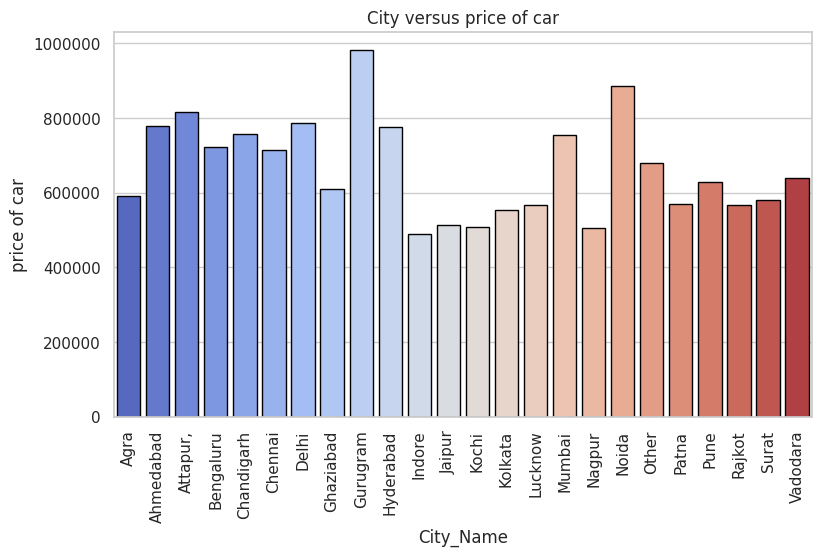

In [ ]:
average_car_price=vehicle.groupby('City_Name')['price of car'].mean().reset_index()
plt.figure(figsize=(9,5))
graph=sns.barplot(x='City_Name',y='price of car',data=average_car_price,palette='coolwarm',edgecolor='black')
graph.yaxis.get_major_formatter().set_scientific(False)
plt.xticks(rotation=90)
plt.title('City versus price of car')
plt.show()

# What is the distribution of car prices in major cities?

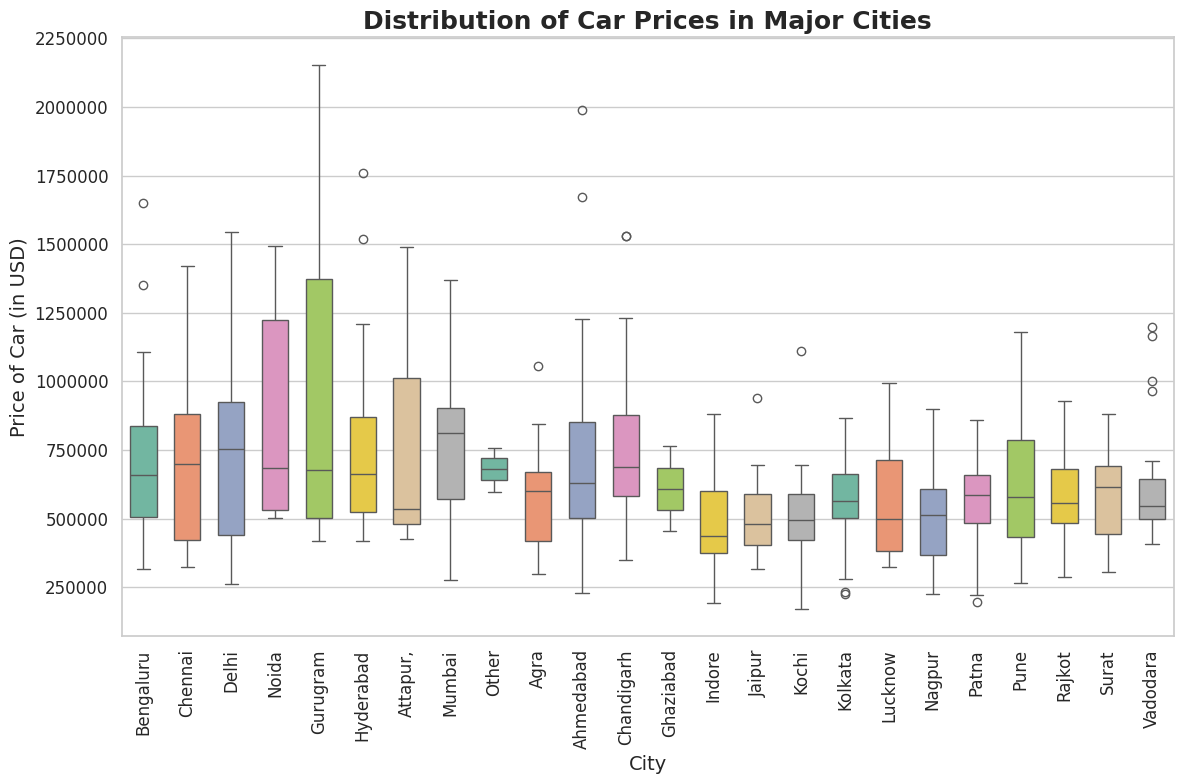

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')
plt.figure(figsize=(12, 8))
sns.boxplot(data=vehicle, x='City_Name', y='price of car', palette='Set2', width=0.6, showfliers=True)
plt.title('Distribution of Car Prices in Major Cities', fontsize=18, weight='bold')

# Disable scientific notation on the y-axis
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.xlabel('City', fontsize=14)
plt.ylabel('Price of Car (in USD)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


# What is the average EMI for used cars in various cities?

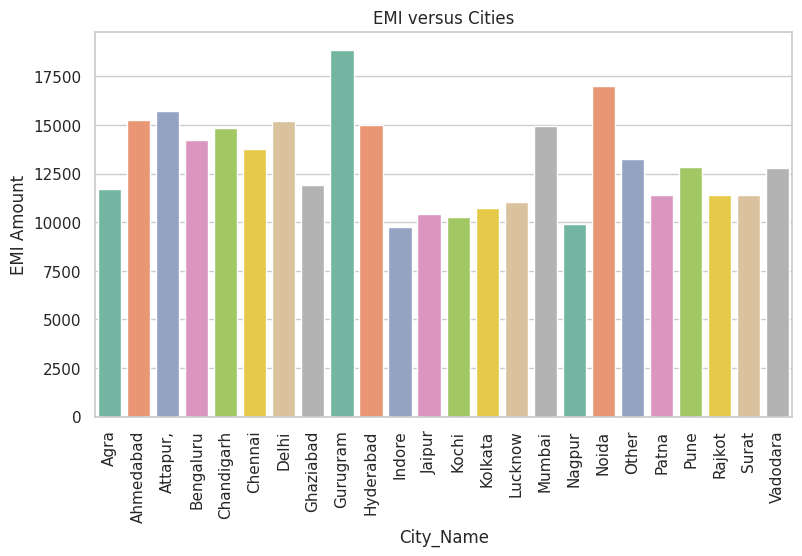

In [ ]:
average_emi=vehicle.groupby('City_Name')['EMI Amount'].mean().reset_index()
plt.figure(figsize=(9,5))
sns.barplot(x='City_Name',y='EMI Amount',data=average_emi,palette='Set2')
plt.xticks(rotation=90)
plt.title('EMI versus Cities')
plt.show()

# How does the choice of fuel type impact the price of used cars in different regions?

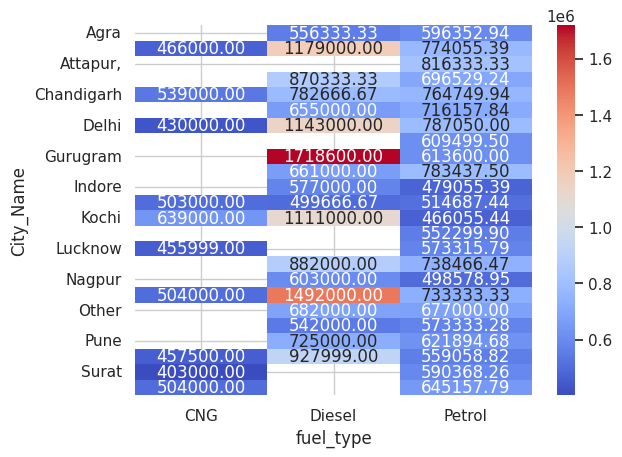

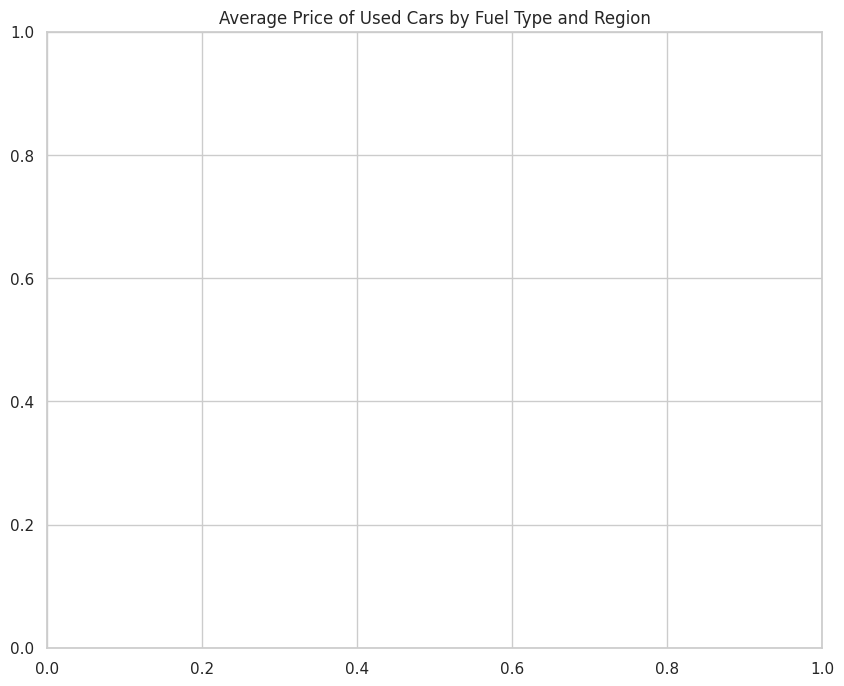

In [ ]:
avg = vehicle.groupby(["City_Name","fuel_type"])["price of car"].mean().reset_index()
pivot_table = avg.pivot(index="City_Name",columns="fuel_type",values="price of car")
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="coolwarm")
plt.figure(figsize=(10,8))
plt.title("Average Price of Used Cars by Fuel Type and Region")
plt.show()

# What is the average number of kilometers driven for used cars in different regions?

     City_Name    kilometers
16      Nagpur  56859.450000
12       Kochi  55236.350000
9    Hyderabad  50824.882353
6        Delhi  49754.500000
10      Indore  49712.350000
21      Rajkot  48338.200000
8     Gurugram  43492.466667
17       Noida  42442.571429
14     Lucknow  42302.000000
5      Chennai  41990.300000
11      Jaipur  40702.900000
19       Patna  39824.800000
20        Pune  39739.950000
18       Other  39286.000000
0         Agra  39086.350000
13     Kolkata  38392.100000
22       Surat  38233.800000
1    Ahmedabad  37662.250000
15      Mumbai  36737.352941
3    Bengaluru  35643.750000
4   Chandigarh  34426.300000
23    Vadodara  31972.350000
7    Ghaziabad  30776.000000
2     Attapur,  26243.000000


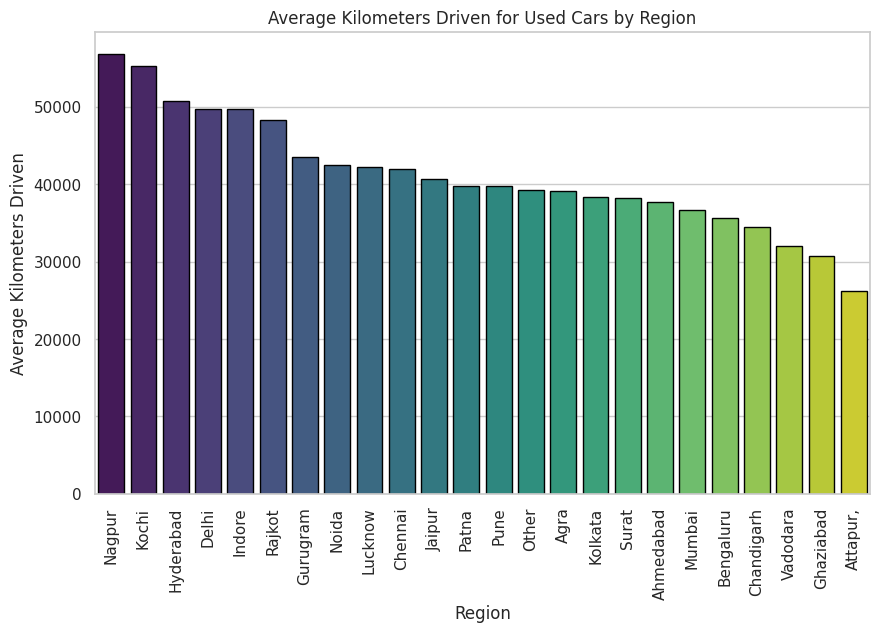

In [ ]:
avg = vehicle.groupby("City_Name")["kilometers"].mean().reset_index()
avg_kilo =  avg.sort_values(by='kilometers', ascending=False)
print(avg_kilo)
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_kilo, x='City_Name', y='kilometers', palette='viridis',edgecolor='black')
plt.title('Average Kilometers Driven for Used Cars by Region')
plt.ylabel('Average Kilometers Driven')
plt.xlabel('Region')
plt.xticks(rotation=90)
plt.show()

# Which cities have the highest availability of premium car brands (like BMW, Audi, etc.)?

     City_Name  Premium_Car_Count
4   Chandigarh                 16
6        Delhi                  4
7     Gurugram                  4
17      Rajkot                  4
1    Ahmedabad                  4
15       Patna                  3
5      Chennai                  3
0         Agra                  2
18       Surat                  2
3    Bengaluru                  2
8    Hyderabad                  2
16        Pune                  2
12     Lucknow                  2
13      Mumbai                  2
10       Kochi                  1
14      Nagpur                  1
11     Kolkata                  1
9       Indore                  1
2     Attapur,                  1
19    Vadodara                  1


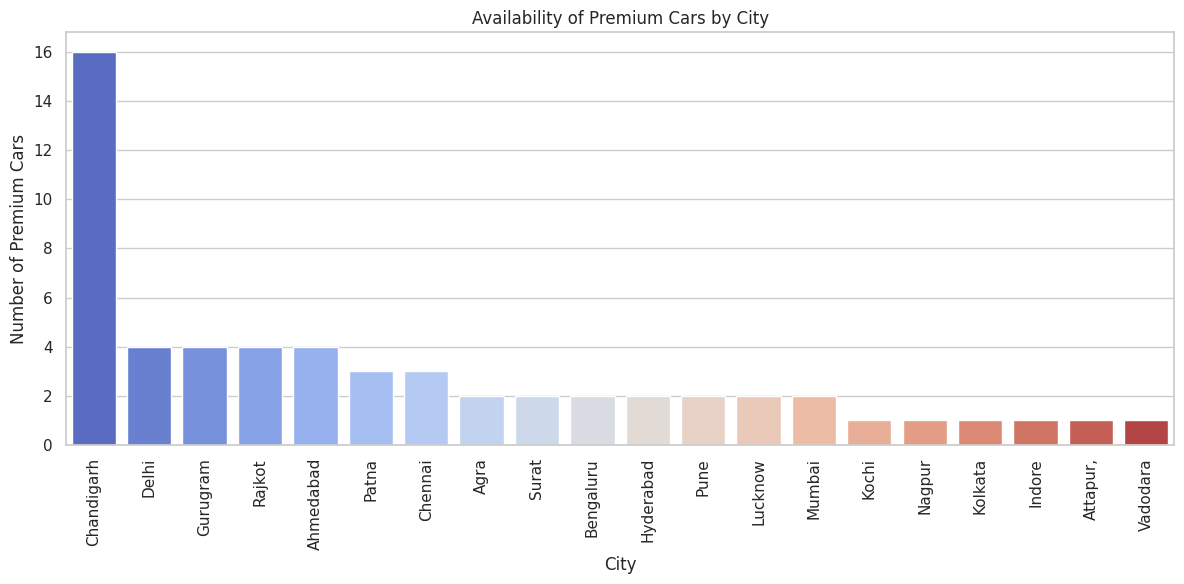

In [ ]:
premium_brands = ['Ford', 'Jeep', 'Toyota', 'MG', 'Skoda', 'Volkswagen', 'KIA']
premium_cars = vehicle[vehicle["company_name"].isin(premium_brands)]
premium_cars_by_city = premium_cars.groupby('City_Name').size().reset_index(name='Premium_Car_Count')
premium_cars_by_city_sorted = premium_cars_by_city.sort_values(by='Premium_Car_Count', ascending=False)
print(premium_cars_by_city_sorted)
plt.figure(figsize=(12, 6))
sns.barplot(data=premium_cars_by_city_sorted, x='City_Name', y='Premium_Car_Count', palette='coolwarm')
plt.title('Availability of Premium Cars by City')
plt.ylabel('Number of Premium Cars')
plt.xlabel('City')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# How does car ownership type (1st, 2nd, 3rd owner) impact car prices in various regions?

     City_Name owner_type  price of car
0         Agra        1st  5.996000e+05
1         Agra        2nd  5.626000e+05
2    Ahmedabad        1st  7.973999e+05
3    Ahmedabad        2nd  9.799997e+05
4    Ahmedabad        3rd  3.384995e+05
5     Attapur,        1st  9.575000e+05
6     Attapur,        2nd  5.340000e+05
7    Bengaluru        1st  7.471998e+05
8    Bengaluru        2nd  7.315000e+05
9    Bengaluru        3rd  3.180000e+05
10  Chandigarh        1st  7.833076e+05
11  Chandigarh        2nd  6.840000e+05
12  Chandigarh        3rd  8.360000e+05
13     Chennai        1st  7.055384e+05
14     Chennai        2nd  7.271429e+05
15       Delhi        1st  7.894091e+05
16       Delhi        2nd  7.600000e+05
17   Ghaziabad        1st  6.094995e+05
18    Gurugram        1st  1.005857e+06
19    Gurugram        2nd  6.470000e+05
20   Hyderabad        1st  7.762353e+05
21      Indore        1st  5.516427e+05
22      Indore        2nd  3.307998e+05
23      Indore        3rd  4.000000e+05


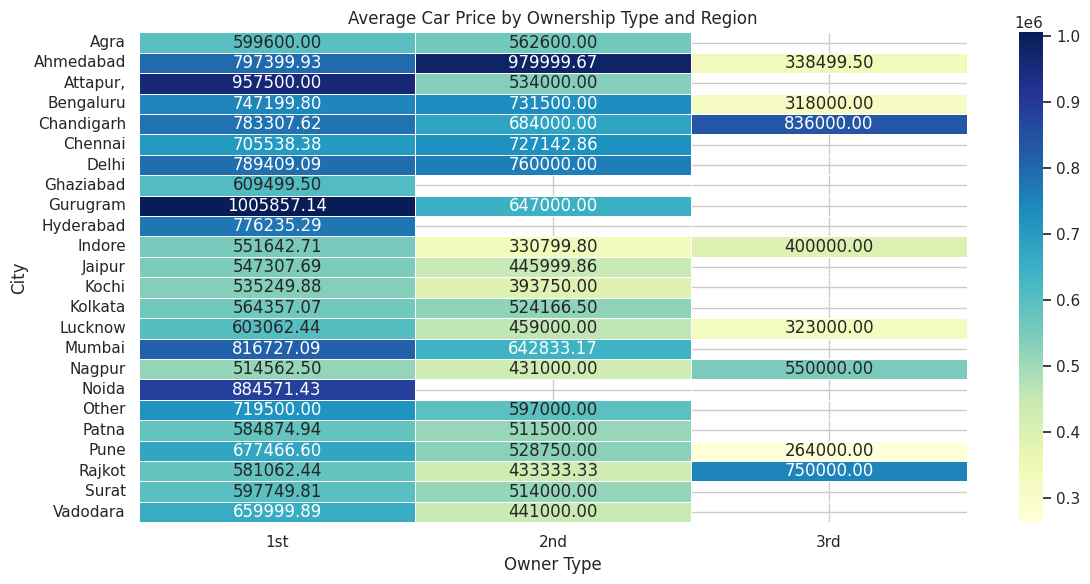

In [ ]:

ownership_price_analysis = vehicle.groupby(['City_Name', 'owner_type'])['price of car'].mean().reset_index()
print(ownership_price_analysis)
ownership_pivot = ownership_price_analysis.pivot(index='City_Name', columns='owner_type', values='price of car')
plt.figure(figsize=(12, 6))
graph=sns.heatmap(ownership_pivot, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=0.5)

plt.title('Average Car Price by Ownership Type and Region')
plt.ylabel('City')
plt.xlabel('Owner Type')
plt.tight_layout()
plt.show()

# **Brand-wise Used Cars Analysis**

# What is the average price of used cars for each brand

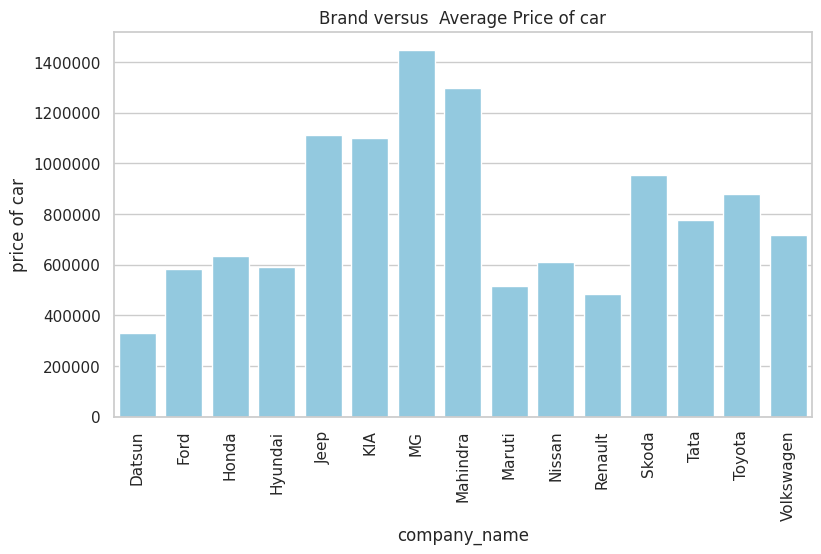

In [ ]:
avg_car=vehicle.groupby('company_name')['price of car'].mean().reset_index()
plt.figure(figsize=(9,5))
graph=sns.barplot(x='company_name',y='price of car',data=avg_car,color='skyblue')
graph.yaxis.get_major_formatter().set_scientific(False)
plt.xticks(rotation=90)
plt.title("Brand versus  Average Price of car")
plt.show()

# What is the average number of kilometers driven for each brand's used cars?

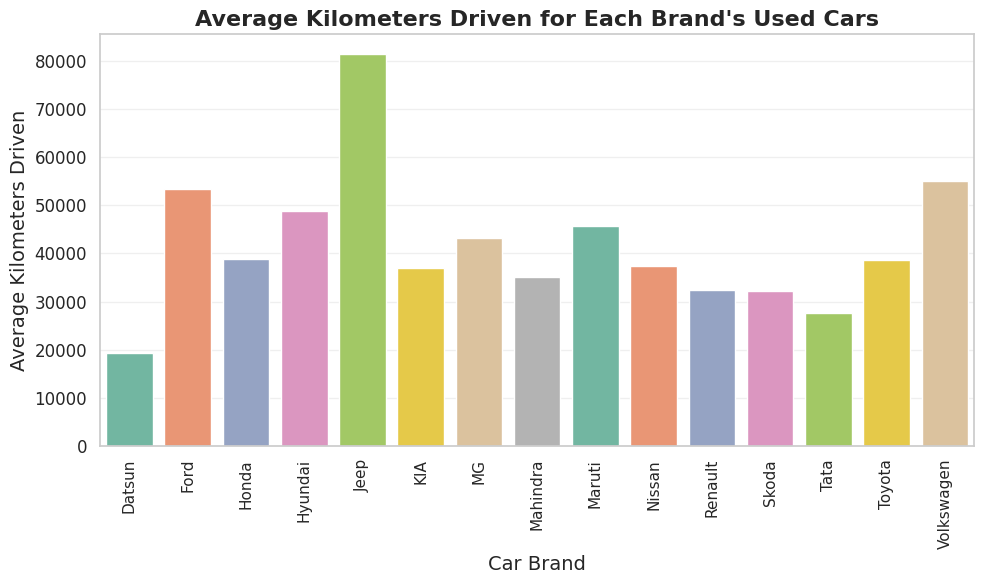

In [ ]:
used_cars = vehicle[vehicle['owner_type'] != 'First Owner']
average_kilometers = used_cars.groupby('company_name')['kilometers'].mean().reset_index()
average_kilometers.columns = ['Brand', 'Average Kilometers']
plt.figure(figsize=(10, 6))
sns.barplot(data=average_kilometers,x='Brand',y='Average Kilometers',palette='Set2')
plt.title('Average Kilometers Driven for Each Brand\'s Used Cars', fontsize=16, weight='bold')
plt.xlabel('Car Brand', fontsize=14)
plt.ylabel('Average Kilometers Driven', fontsize=14)
plt.xticks(rotation=90)
plt.yticks(fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# What is the distribution of manual vs. automatic transmission in different brands?

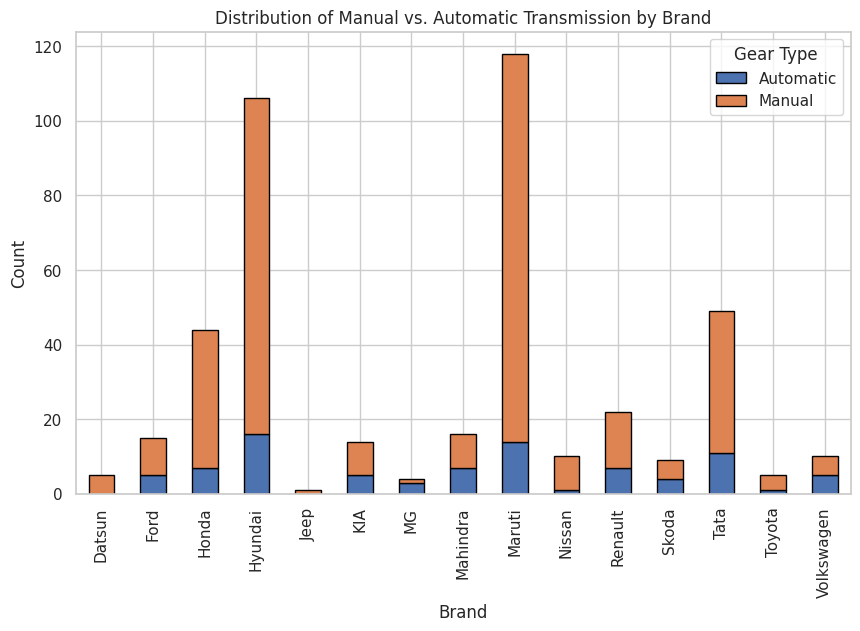

In [ ]:
transmission_distribution = vehicle.groupby(['company_name', 'Gear_Type']).size().reset_index(name='count')
pivot_table = transmission_distribution.pivot(index='company_name', columns='Gear_Type', values='count').fillna(0)
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6),edgecolor='black')
plt.title('Distribution of Manual vs. Automatic Transmission by Brand')
plt.ylabel('Count')
plt.xlabel('Brand')
plt.legend(title='Gear Type')
plt.show()

# Which brands have the lowest EMI costs for used cars?

Brands with Lowest EMI Costs:
   company_name          mean    min
8        Maruti  10449.008475   4379
3       Hyundai  11832.301887   4477
0        Datsun   6479.600000   5465
10      Renault   9463.136364   5846
2         Honda  12463.431818   6152
7      Mahindra  24760.250000   6628
12         Tata  14970.224490   7566
1          Ford  11566.400000   8719
9        Nissan  11966.900000   9619
14   Volkswagen  13958.300000   9677
11        Skoda  18485.000000  12390
5           KIA  20980.857143  15627
13       Toyota  17636.600000  16369
4          Jeep  21147.000000  21147
6            MG  27552.000000  22441


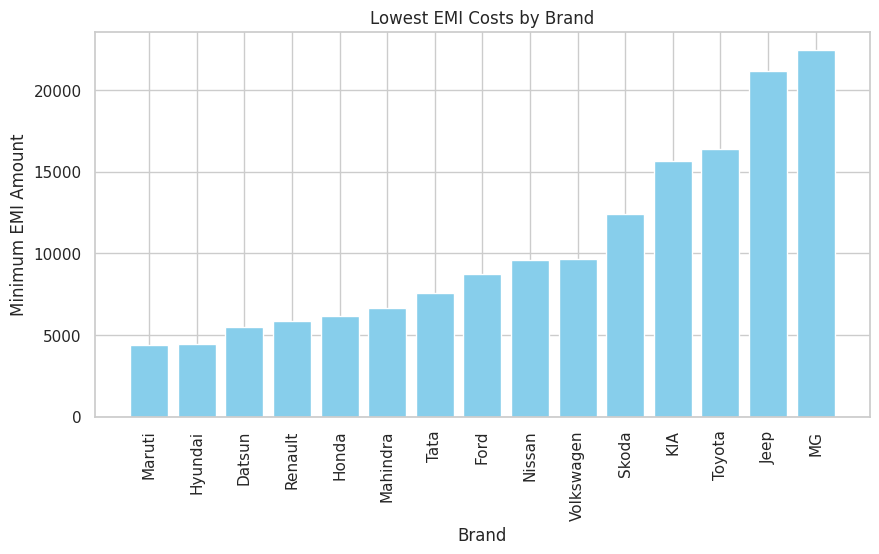

In [ ]:
emi_stats = vehicle.groupby('company_name')['EMI Amount'].agg(['mean', 'min']).reset_index()
lowest_emi_brands = emi_stats.sort_values(by='min', ascending=True)
print("Brands with Lowest EMI Costs:")
print(lowest_emi_brands)
plt.figure(figsize=(10, 5))
plt.bar(lowest_emi_brands['company_name'], lowest_emi_brands['min'], color='skyblue')
plt.title('Lowest EMI Costs by Brand')
plt.xlabel('Brand')
plt.ylabel('Minimum EMI Amount')
plt.xticks(rotation=90)
plt.show()

# What are the most common models sold for each brand?

    company_name                            car_name  Model_Count
2         Datsun                           Redi Go T            2
4           Ford  Ecosport TITANIUM + 1.5L PETROL AT            4
13         Honda                Amaze 1.2L I-VTEC VX            6
60       Hyundai     Grand i10 SPORTZ 1.2 KAPPA VTVT           10
91          Jeep          Compass LIMITED 2.0 DIESEL            1
96           KIA          SELTOS HTK PLUS 1.5 DIESEL            3
101           MG         HECTOR SHARP 1.5 PETROL CVT            3
107     Mahindra            Thar LX PETROL HT 4WD AT            3
131       Maruti              Baleno ZETA PETROL 1.2            9
176       Nissan                          MAGNITE XL            3
190      Renault                    Kwid RXT 1.0 (O)            5
197        Skoda           Rapid AMBITION 1.6 MPI MT            4
205         Tata                     ALTROZ XZA PLUS            4
230       Toyota                 Innova 2.5 VX 8 STR            2
240   Volk

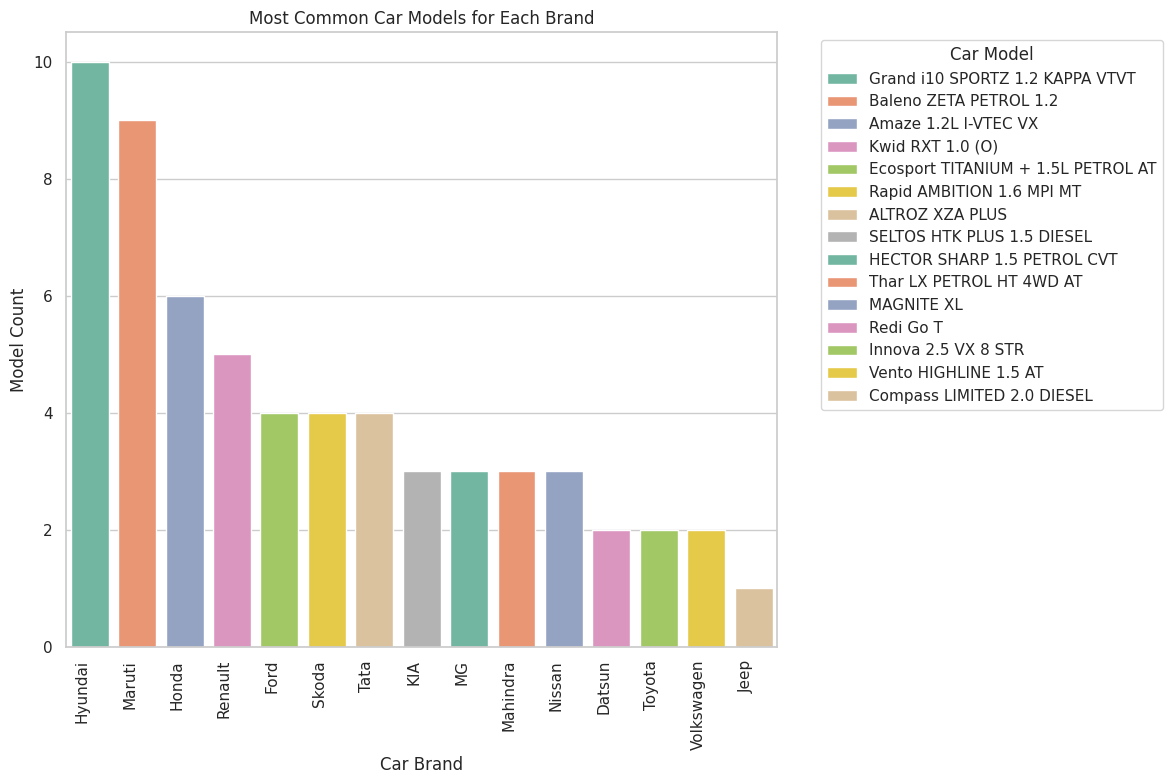

In [ ]:
common_models = vehicle.groupby(['company_name', 'car_name']).size().reset_index(name='Model_Count')
most_common_models = common_models.loc[common_models.groupby('company_name')['Model_Count'].idxmax()]
print(most_common_models)
most_common_models_sorted = most_common_models.sort_values(by='Model_Count', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(data=most_common_models_sorted, x='company_name', y='Model_Count', hue='car_name', palette='Set2')
plt.title('Most Common Car Models for Each Brand')
plt.xlabel('Car Brand')
plt.ylabel('Model Count')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Car Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# What is the average age (year of manufacture) of used cars for each brand in the market?

   company_name   car_age
4          Jeep  7.000000
3       Hyundai  6.103774
8        Maruti  5.949153
1          Ford  5.866667
2         Honda  5.659091
14   Volkswagen  5.300000
13       Toyota  5.000000
11        Skoda  4.222222
0        Datsun  3.800000
10      Renault  3.500000
7      Mahindra  3.375000
5           KIA  3.357143
12         Tata  3.040816
6            MG  3.000000
9        Nissan  2.700000


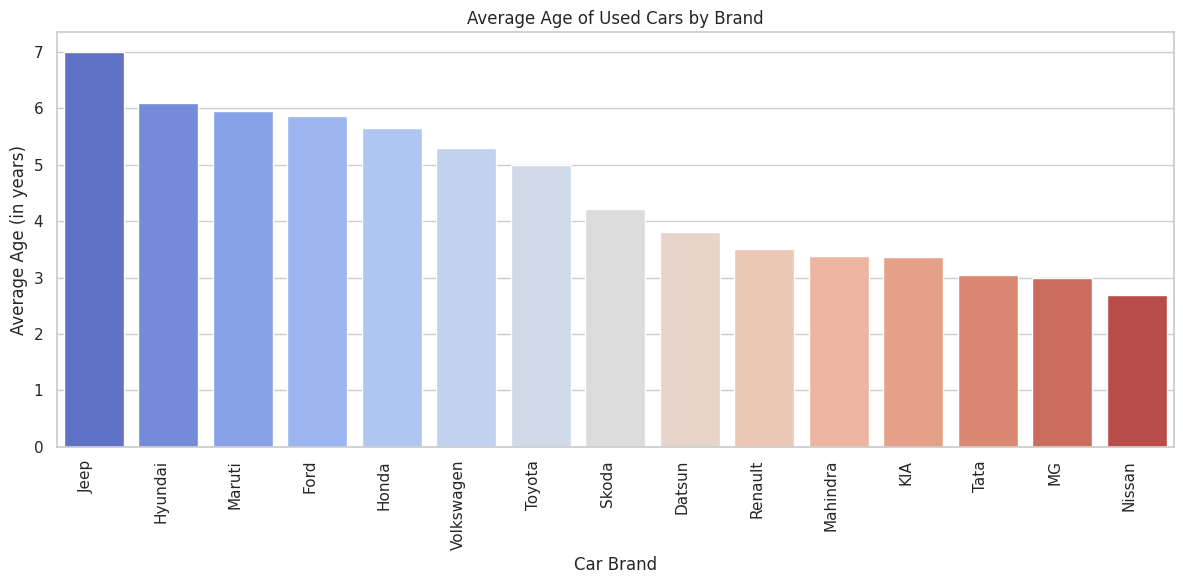

In [ ]:
import datetime
current_year = datetime.datetime.now().year
vehicle['car_age'] = current_year - vehicle['year']
average_age_by_brand = vehicle.groupby('company_name')['car_age'].mean().reset_index()
average_age_by_brand_sorted = average_age_by_brand.sort_values(by='car_age', ascending=False)
print(average_age_by_brand_sorted)
plt.figure(figsize=(12, 6))
sns.barplot(data=average_age_by_brand_sorted, x='company_name', y='car_age', palette='coolwarm')
plt.title('Average Age of Used Cars by Brand')
plt.xlabel('Car Brand')
plt.ylabel('Average Age (in years)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

# Which brands have the highest resale value for used **cars**

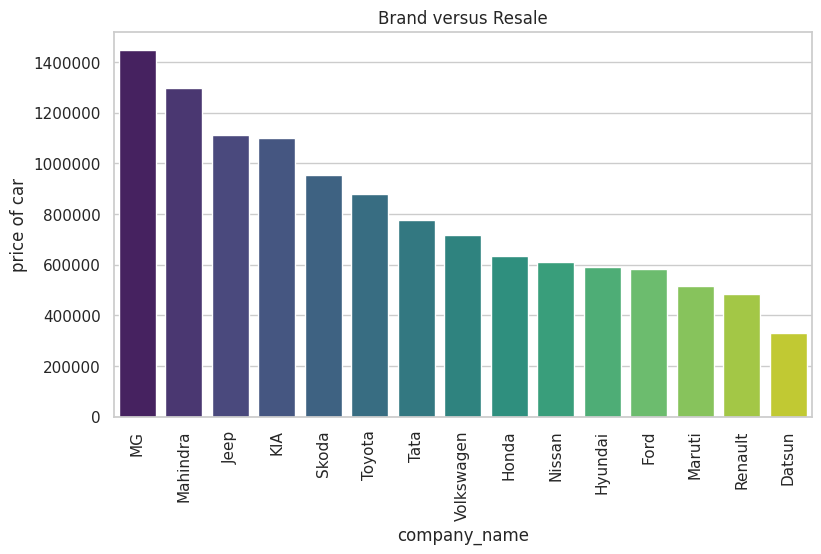

In [ ]:
resale_best_car=vehicle.groupby('company_name')[['year','kilometers','price of car']].mean().reset_index()
sort=resale_best_car.sort_values(by='price of car',ascending=False)
plt.figure(figsize=(9,5))
graph=sns.barplot(x='company_name',y='price of car',data=sort,palette='viridis')
graph.yaxis.get_major_formatter().set_scientific(False)
plt.xticks(rotation=90)
plt.title("Brand versus Resale")
plt.show()


# **Conclusion:**

# **Scraped and analyzed data (~450 rows, 12 columns) using BeautifulSoup and Pandas.**
# **Performed univariate, bivariate, and multivariate analysis with Matplotlib and Seaborn.**

# **Market Leaders: Maruti Suzuki and Hyundai dominate the market.**
# **Ownership Insight: First-owner cars retain better value.**
# **Affordable Brands: Datsun, Renault, and Maruti offer budget-friendly options.**
# **Recommendations:**

# **Companies: Focus on Gurugram and Noida for high sales potential**

# **Customers: Choose Maruti Suzuki or Hyundai for affordable options and Mahindra or Kia for premium vehicles**
